<a href="https://colab.research.google.com/github/londonsangongzi/colab_files/blob/main/test_findlr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Help with lr-finder working with transformers?](https://github.com/davidtvs/pytorch-lr-finder/issues/55)
It seems that XLMRobertaForSequenceClassification.forward() returns a tuple object (in v3.0.2), and that makes it failed to compute loss in LRFinder._train_batch().

Currently, it takes only [single item](https://github.com/davidtvs/pytorch-lr-finder/blob/c476676/torch_lr_finder/lr_finder.py#L344) returned from model.forward() in LRFinder._train_batch(). Therefore, there are 2 solutions for this case:

In [ ]:
!pip install transformers
!pip install wget
#!pip install torch-lr-finder

In [ ]:
#from torch_lr_finder import LRFinder
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset,TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'Colab Codes/sgz_modules/'

sys.path.append(base_dir)
from sgzDistilBertClassifier import sgzDistilBertClassifier
from sgzFinetuning import sgzFinetuning,sgzFinetuningConfig

Mounted at /content/drive


In [ ]:
import wget
import os
import pandas as pd

print('Downloading dataset...')
# The URL for the dataset zip file.
url = 'https://nyu-mll.github.io/CoLA/cola_public_1.1.zip'
# Download the file (if we haven't already)
if not os.path.exists('./cola_public_1.1.zip'):
    wget.download(url, './cola_public_1.1.zip')
print('Done.')
# Unzip the dataset (if we haven't already)
if not os.path.exists('./cola_public/'):
    !unzip cola_public_1.1.zip

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Get the lists of sentences and their labels.
#df = df.sample(256) #just for test
sentences = df.sentence.values
labels = df.label.values   

Done.
Number of training sentences: 8,551



In [ ]:
c = sgzFinetuningConfig(train_ratio=1,batch_size=32*8)
"""
c = sgzFinetuningConfig(train_ratio=1,batch_size=32*8,BN='before_activation',pooling_token='words',
                        dim_of_hidden_layers=[64],
                        #pooling_way='concat_last4_hidden_states',
                        #pooling_meanmax='concat_mean_max',
                        )
"""                        
ft = sgzFinetuning(sentences,labels,c,random_seed=1)
log_lrs,losses = ft.find_lr(beta=0)

There are 1 GPU(s) available.
We will use the GPU: Tesla T4
8,551 training samples
    0 validation samples


 68%|██████▊   | 23/34 [00:19<00:08,  1.28it/s]

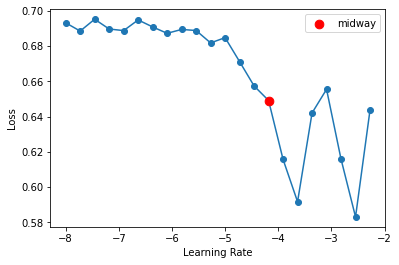

{'lr_midway': -4.181818181818182,
 'lr_min_10': -3.5454545454545454,
 'lr_steep': -2.818181818181818}

In [ ]:
recommend_lr=ft.get_recommend_lr(losses,log_lrs,bplot=True)
recommend_lr